In [32]:
import pandas as pd
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split, cross_val_score

In [4]:
cleanedData = pd.read_csv('./Fully-Cleaned-Data.csv')

In [5]:
categoricalColumns = cleanedData.select_dtypes(include=['object']).columns.tolist()
numericalData = cleanedData.drop(columns=categoricalColumns)
oneHotData = pd.get_dummies(cleanedData[categoricalColumns])
print(numericalData.shape)
print(numericalData.columns.values)
print(oneHotData.shape)
print(oneHotData.columns.values)

(2047, 19)
['AgeatFV' 'DiseasedurationatFV' 'EDSS_FV' 'PYRAMIDAL_FUNCTION'
 'CEREBELLAR_FUNCTION' 'BRAINSTEM_FUNCTION' 'SENSORY_FUNCTION'
 'BOWEL_BLADDER_FUNCTION' 'VISUAL_FUNCTION' 'MENTAL_FUNCTION'
 'TotalnumberofrelapsesbeforeFV' 'Numberofrelapsesinthe3yearsbeforeFV'
 'Numberofrelapsesinthe1yearbeforeFV' 'timeSinceLastAttack'
 'Future Relapse Binary' 'TreatmentBeforeFV' 'RelapseInYearBeforeFVBinary'
 'RelapseInThe3YearsBeforeFVBinary' 'Treatment with Injectable Med']
(2047, 29)
['SEX_F' 'SEX_M' 'RACE_DESC_American Indian or Alaska Native'
 'RACE_DESC_Asian' 'RACE_DESC_Black or African American'
 'RACE_DESC_East Asian and South-East' 'RACE_DESC_More than one race'
 'RACE_DESC_Native Hawaiian or Other Pacific Islander'
 'RACE_DESC_South Asian' 'RACE_DESC_Unknown or not reported'
 'RACE_DESC_White' 'ETHNICITY_DESC_Hispanic or latino'
 'ETHNICITY_DESC_Not hispanic or latino' 'ETHNICITY_DESC_Unknown'
 'FAMILY_MS_N' 'FAMILY_MS_U' 'FAMILY_MS_Y' 'SMOKING_EVER_N'
 'SMOKING_EVER_Y' 'DISEASE_C

In [6]:
cleanedDataOneHotEncoded = pd.concat([numericalData, oneHotData], axis=1)
print(cleanedDataOneHotEncoded.shape)

(2047, 48)


In [85]:
import warnings
warnings.filterwarnings('ignore')

treeClassifier = tree.DecisionTreeClassifier(max_depth=5, class_weight='balanced')


indicator = cleanedDataOneHotEncoded['Future Relapse Binary']
X = cleanedDataOneHotEncoded.drop(['Future Relapse Binary'], axis=1)
XTrain, XTest, yTrain, yTest = train_test_split(X, indicator)
treeModel = treeClassifier.fit(XTrain, yTrain)

testPredictions = pd.DataFrame(treeModel.predict(XTest))
print('True Class Breakdown')
print(indicator.value_counts())
print('Predicted Class Breakdown')
print(testPredictions.value_counts())



True Class Breakdown
Future Relapse Binary
0    1315
1     732
Name: count, dtype: int64
Predicted Class Breakdown
0
0    296
1    216
Name: count, dtype: int64


In [ ]:
scores = cross_val_score(treeClassifier, XTrain, yTrain, cv=10, verbose=3)
print(scores)

[CV] END ................................ score: (test=0.597) total time=   0.0s
[CV] END ................................ score: (test=0.558) total time=   0.0s
[CV] END ................................ score: (test=0.630) total time=   0.0s
[CV] END ................................ score: (test=0.513) total time=   0.0s
[CV] END ................................ score: (test=0.571) total time=   0.0s
[CV] END ................................ score: (test=0.582) total time=   0.0s
[CV] END ................................ score: (test=0.556) total time=   0.0s
[CV] END ................................ score: (test=0.627) total time=   0.0s
[CV] END ................................ score: (test=0.523) total time=   0.0s
[CV] END ................................ score: (test=0.562) total time=   0.0s
[0.5974026  0.55844156 0.62987013 0.51298701 0.57142857 0.58169935
 0.55555556 0.62745098 0.52287582 0.5620915 ]


In [31]:
testAcc = metrics.accuracy_score(yTest, testPredictions)
testBalancedAccScore = metrics.balanced_accuracy_score(yTest, testPredictions)
testPrecScore = metrics.precision_score(yTest, testPredictions)
print(testAcc)
print(testBalancedAccScore)
print(testPrecScore)

testCM = confusion_matrix(yTest, testPredictions)
print(testCM)

testCR = classification_report(yTest, testPredictions)
print(testCR)

0.5560975609756098
0.5962357954545454
0.44642857142857145
[[167 217]
 [ 56 175]]
              precision    recall  f1-score   support

           0       0.75      0.43      0.55       384
           1       0.45      0.76      0.56       231

    accuracy                           0.56       615
   macro avg       0.60      0.60      0.56       615
weighted avg       0.64      0.56      0.55       615



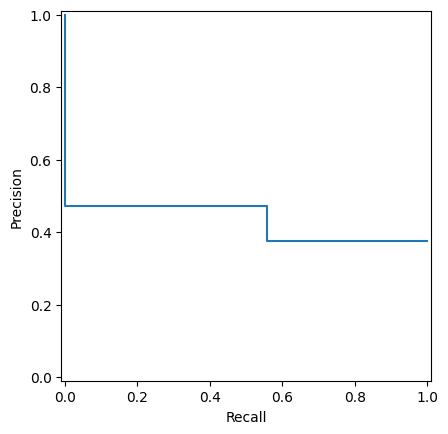

In [28]:
precision, recall, _ = precision_recall_curve(yTest, testPredictions)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

In [8]:
accScore = metrics.accuracy_score(indicator, predictions)
balancedAccScore = metrics.balanced_accuracy_score(indicator, predictions)
precScore = metrics.precision_score(indicator, predictions)
recScore = metrics.recall_score(indicator, predictions)
yeet = metrics.f1_score(indicator, predictions)
### add auc score (??)
print(accScore)
print(balancedAccScore)
print(precScore)
print(recScore)
print(yeet)

cm = confusion_matrix(indicator, predictions)
print(cm)

cr = classification_report(indicator, predictions)
print(cr)

NameError: name 'predictions' is not defined